In [17]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib

# Function to extract features using VGG16
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

# Root directory of the dataset
dataset_dir_potato = '../img/correct/Potato'
dataset_dir_corn = '../img/correct/Corn'
dataset_dir_tomato = '../img/correct/Tomato'

label_encoder = LabelEncoder()


In [18]:
def define_targets(dataset_dir):
    # Loop over the subdirectories and image files in the dataset directory
    X = []
    y = []
    for label in os.listdir(dataset_dir):
        label_dir = os.path.join(dataset_dir, label)
        if os.path.isdir(label_dir):
            for file in os.listdir(label_dir):
                # Construct the full image path
                img_path = os.path.join(label_dir, file)
                try:
                    # Extract features and append to list
                    features = extract_features(img_path, base_model)
                    X.append(features)
                    # Append the label
                    y.append(label)
                except Exception as e:
                    print(f"Error processing file {img_path}: {e}")
    return X, y

In [19]:
def train_test_split_func(X, y):
    y = label_encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [20]:
def decision_tree(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    return clf

In [21]:
def random_forest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    return clf

In [22]:
def svc(X_train, X_test, y_train, y_test):
    clf = SVC(kernel='linear', probability=True)
    clf.fit(X_train, y_train)
    
    return clf

In [23]:
def knn(X_train, X_test, y_train, y_test):
    clf = KNeighborsClassifier(n_neighbors=10)
    clf.fit(X_train, y_train)
    
    return clf

In [25]:
def gradient_boost(X_train, X_test, y_train, y_test):
    clf = GradientBoostingClassifier(n_estimators=100, random_state=42, n_iter_no_change=10)
    clf.fit(X_train, y_train)
    
    return clf

In [26]:
# Definir os estimadores base
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(kernel='linear', probability=True)),
    ('knn', KNeighborsClassifier(n_neighbors=10))
]

# Definir o estimador final
final_estimator = GradientBoostingClassifier(n_estimators=100, random_state=42, n_iter_no_change=10)

In [27]:
def stacking(X_train, X_test, y_train, y_test, plant):
    # Configurar o StackingClassifier
    clf = StackingClassifier(
        estimators=estimators,
        final_estimator=final_estimator
    )
    
    # Treinar o modelo
    clf.fit(X_train, y_train)
    
    # Fazer previsões
    y_pred = clf.predict(X_test)
    
    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    #Salvar o modelo localmente
    model_saved = joblib.dump(clf, f"clf_{plant}.joblib")

    return y_pred, model_saved

In [6]:
X_corn, y_corn = define_targets(dataset_dir_corn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/ste

In [28]:
X_train_corn, X_test_corn, y_train_corn, y_test_corn = train_test_split_func(X_corn, y_corn)

In [29]:
clfDT = decision_tree(X_train_corn, X_test_corn, y_train_corn, y_test_corn)

In [30]:
clfRF = random_forest(X_train_corn, X_test_corn, y_train_corn, y_test_corn)

In [31]:
clfSVC = svc(X_train_corn, X_test_corn, y_train_corn, y_test_corn)

In [32]:
clfKNN = knn(X_train_corn, X_test_corn, y_train_corn, y_test_corn)

In [33]:
clfGB = gradient_boost(X_train_corn, X_test_corn, y_train_corn, y_test_corn)

In [8]:
clfST, model = stacking(X_train_corn, X_test_corn, y_train_corn, y_test_corn, 'corn')

Accuracy: 95.00%


In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_corn, y_train_corn)

# Fazer previsões
y_pred = gnb.predict(X_test_corn)
model_saved = joblib.dump(y_pred, f"clfNaive_corn.joblib")
accuracy = accuracy_score(y_test_corn, y_pred)
accuracy

0.7175

In [40]:
def naive(X_train, X_test, y_train, y_test, plant):
    gnb = GaussianNB()
    # Treinar o modelo
    gnb.fit(X_train, y_train)
    
    # Fazer previsões
    y_pred = gnb.predict(X_test)
    
    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    

    model_saved = joblib.dump(gnb, f"clfNaive_{plant}.joblib")

    return y_pred, model_saved

In [41]:
# Fazer previsões
y_pred, modelNaive = naive(X_train_corn, X_test_corn, y_train_corn, y_test_corn, 'corn')
accuracy = accuracy_score(y_test_corn, y_pred)
accuracy

Accuracy: 71.75%


0.7175

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [12]:
def plot_real_vs_pred(y_real, y_pred):
    plt.figure(figsize=(10, 6))
    
    # Plotar valores reais e preditos
    plt.plot(y_real, label="Valores Reais", marker='o')
    plt.plot(y_pred, label="Valores Preditos", marker='x')

    # Adicionar título e legendas
    plt.title("Real vs Predito")
    plt.xlabel("Amostra")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    
    # Mostrar o gráfico
    plt.show()


In [13]:
def calculate_errors(y_real, y_pred):
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    
    return mae, mse, rmse


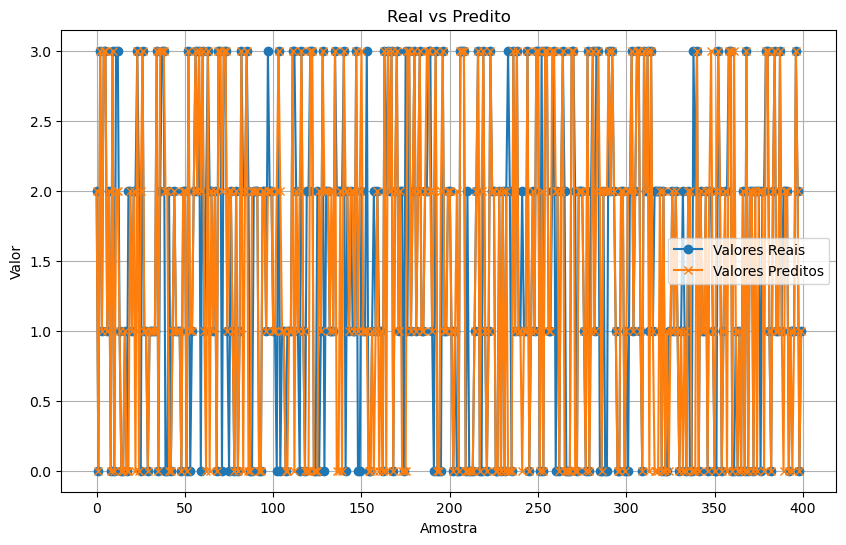

Mean Absolute Error (MAE): 0.39
Mean Squared Error (MSE): 0.76
Root Mean Squared Error (RMSE): 0.87


(0.3875, 0.7575, 0.8703447592764605)

In [34]:
predDT = clfDT.predict(X_test_corn)
plot_real_vs_pred(y_test_corn, predDT)
calculate_errors(y_test_corn, predDT)

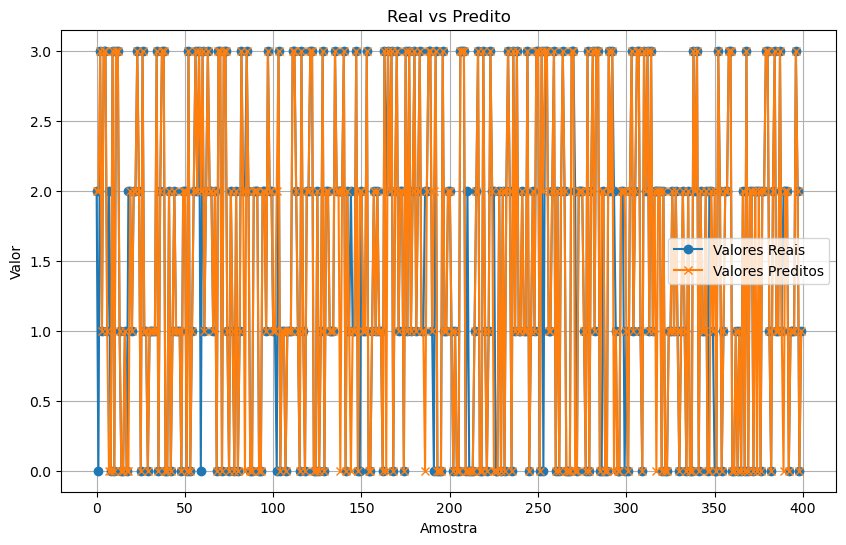

Mean Absolute Error (MAE): 0.12
Mean Squared Error (MSE): 0.24
Root Mean Squared Error (RMSE): 0.49


(0.12, 0.24, 0.4898979485566356)

In [35]:
predRF = clfRF.predict(X_test_corn)
plot_real_vs_pred(y_test_corn, predRF)
calculate_errors(y_test_corn, predRF)

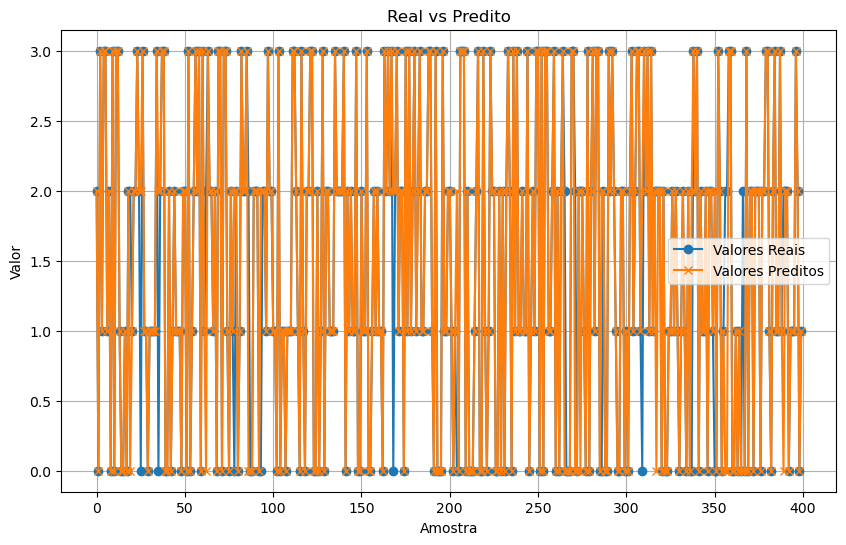

Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.21
Root Mean Squared Error (RMSE): 0.46


(0.105, 0.21, 0.458257569495584)

In [36]:
predSVC = clfSVC.predict(X_test_corn)
plot_real_vs_pred(y_test_corn, predSVC)
calculate_errors(y_test_corn, predSVC)

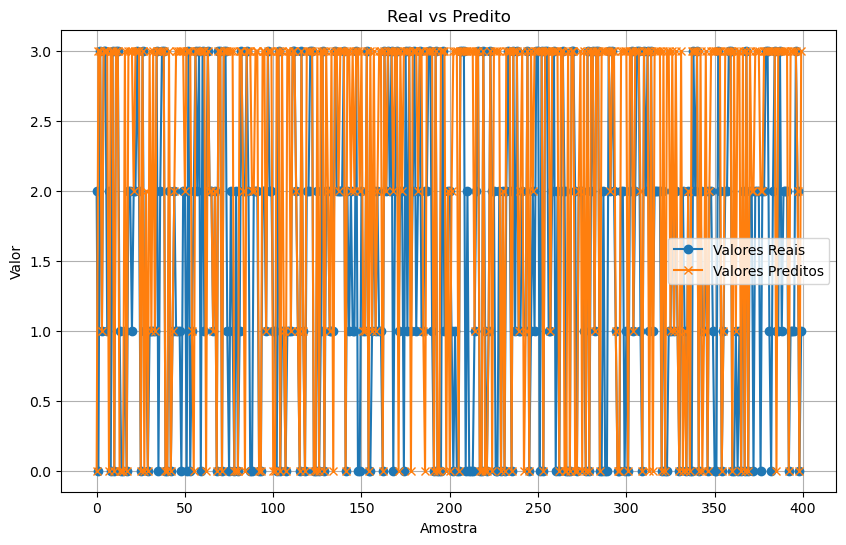

Mean Absolute Error (MAE): 0.81
Mean Squared Error (MSE): 1.66
Root Mean Squared Error (RMSE): 1.29


(0.8125, 1.6625, 1.2893796958227628)

In [37]:
predKNN = clfKNN.predict(X_test_corn)
plot_real_vs_pred(y_test_corn, predKNN)
calculate_errors(y_test_corn, predKNN)

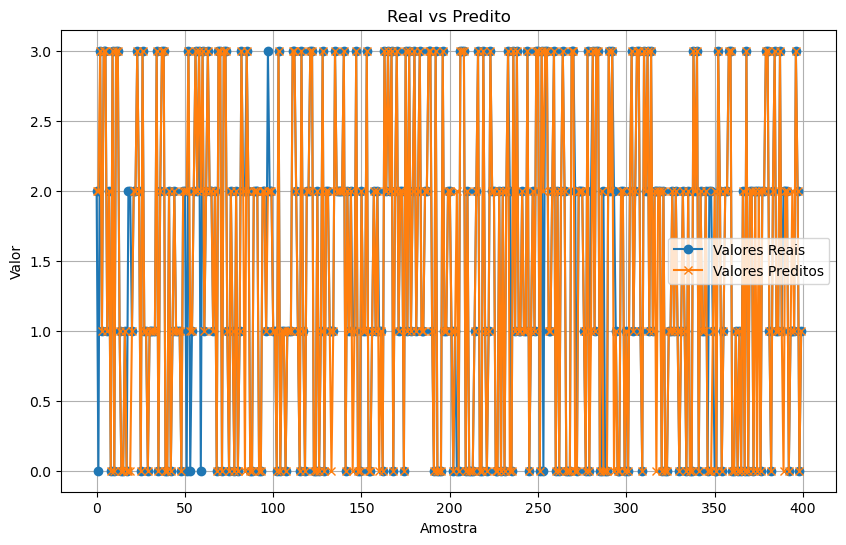

Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.21
Root Mean Squared Error (RMSE): 0.46


(0.1125, 0.2075, 0.45552167895721496)

In [38]:
predGB = clfGB.predict(X_test_corn)
plot_real_vs_pred(y_test_corn, predGB)
calculate_errors(y_test_corn, predGB)

In [28]:
!pip install google.cloud

In [34]:
from google.cloud import storage
import joblib
import tempfile

In [35]:
temp_dir = tempfile.mkdtemp()

# Configuração do Google Cloud Storage
BUCKET_NAME = 'ensemble-models-tcc'

In [36]:
def load_model(name_model):
    client = storage.Client()
    bucket = client.bucket(BUCKET_NAME)
    blob = bucket.blob(f"{name_model}.joblib")
    
    # Baixar o modelo para um diretório temporário
    temp_model_path = os.path.join(temp_dir, f"{name_model}.joblib")
    blob.download_to_filename(temp_model_path)
    
    # Carregar o modelo
    model = joblib.load(temp_model_path)
    return model


In [37]:
model_corn = load_model("clf_corn")


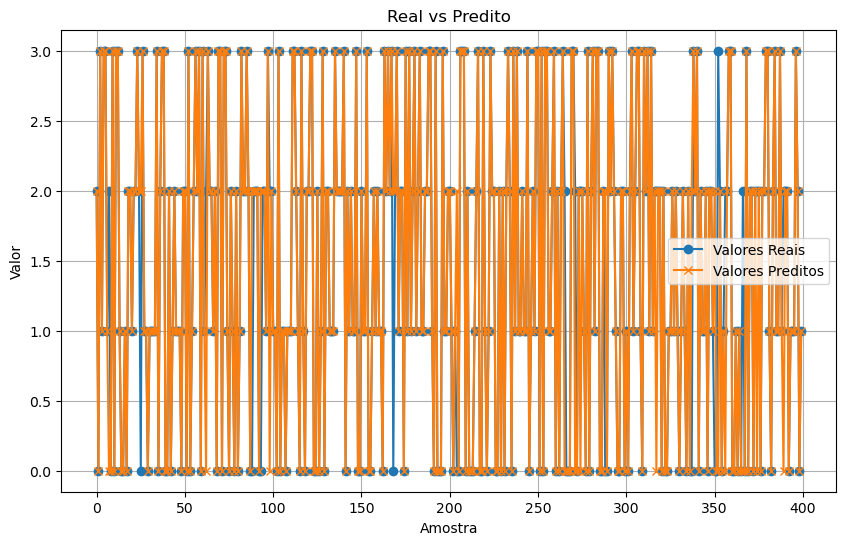

Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.21
Root Mean Squared Error (RMSE): 0.46


(0.1025, 0.2125, 0.4609772228646444)

In [14]:
#clfST = model_corn.predict(X_test_corn)
plot_real_vs_pred(y_test_corn, clfST)
calculate_errors(y_test_corn, clfST)

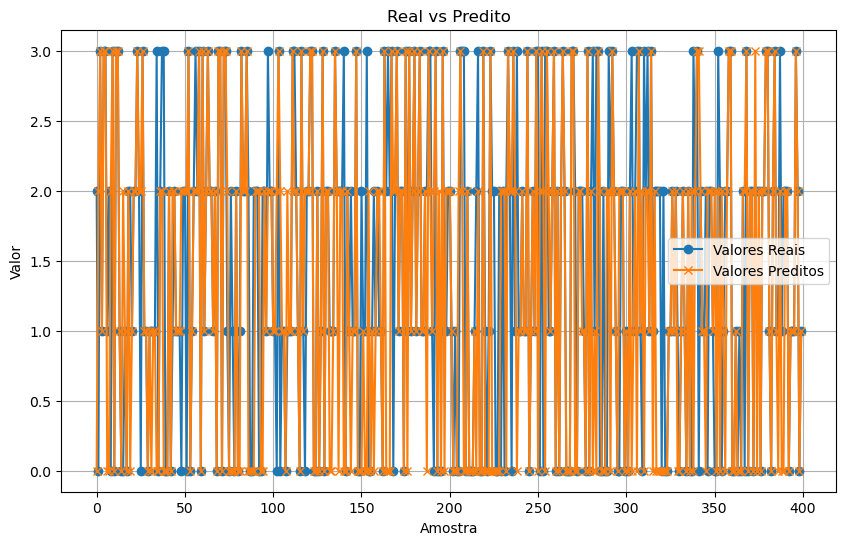

Mean Absolute Error (MAE): 0.51
Mean Squared Error (MSE): 1.05
Root Mean Squared Error (RMSE): 1.03


(0.5125, 1.0525, 1.0259142264341596)

In [15]:
plot_real_vs_pred(y_test_corn, y_pred)
calculate_errors(y_test_corn, y_pred)

In [8]:
y_pred_test_without_opencv = [2, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2]
y_pred_test_with_opencv = [0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 3, 3, 3, 3, 1, 3, 3, 0, 2, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0]
y_real_test = [1]*10 + [0] * 10 + [3]*10 + [2]*10

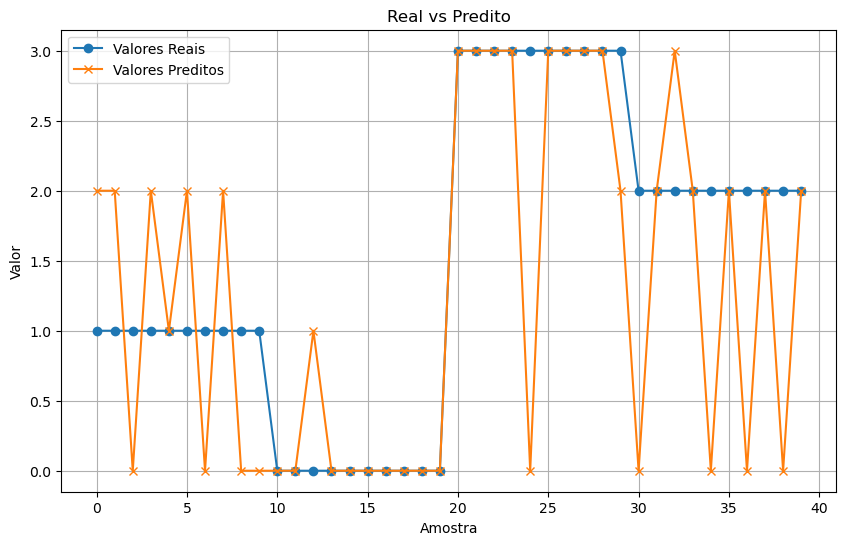

In [10]:
plot_real_vs_pred(y_real_test, y_pred_test_without_opencv)

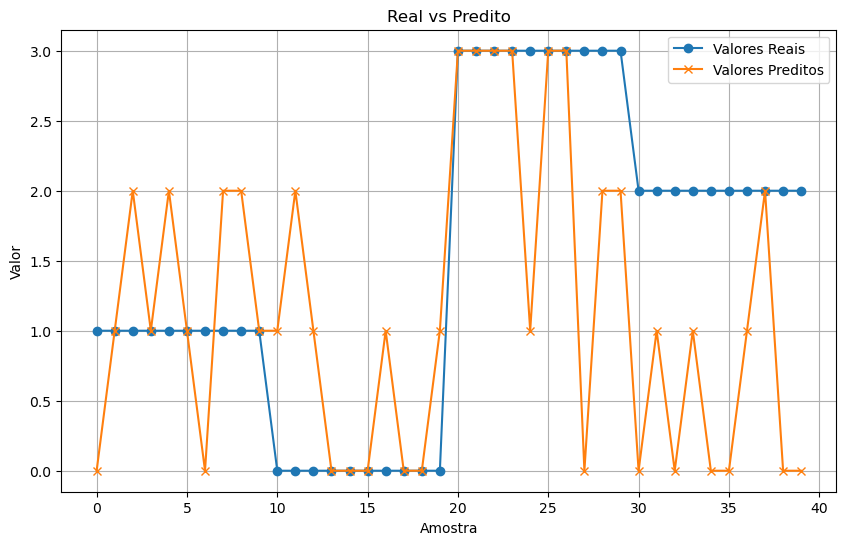

In [11]:
plot_real_vs_pred(y_real_test, y_pred_test_with_opencv)

In [47]:
accuracy = accuracy_score(y_test_corn, predGB)
accuracy

0.935